In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
import semopy
import pandas as pd
from semopy import Model
import statsmodels.formula.api as smf
import statsmodels.api as sm

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pathfasfa1 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\fasfa"
filesfasfa1= os.listdir(pathfasfa1)
pathfasfa2 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\fasfa"
filesfasfa2= os.listdir(pathfasfa2)
pathfasfa3 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\fasfa"
filesfasfa3= os.listdir(pathfasfa3)
pathfasfa4 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\fasfa"
filesfasfa4= os.listdir(pathfasfa4)
pathfasfa5 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\fasfa"
filesfasfa5= os.listdir(pathfasfa5)
pathfasfa6 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\fasfa"
filesfasfa6= os.listdir(pathfasfa6)

In [3]:
pathchisfa1 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\chisfa"
fileschisfa1= os.listdir(pathchisfa1)
pathchisfa2 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\chisfa"
fileschisfa2= os.listdir(pathchisfa2)
pathchisfa3 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\chisfa"
fileschisfa3= os.listdir(pathchisfa3)
pathchisfa4 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\chisfa"
fileschisfa4= os.listdir(pathchisfa4)
pathchisfa5 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\chisfa"
fileschisfa5= os.listdir(pathchisfa5)
pathchisfa6 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\chisfa"
fileschisfa6= os.listdir(pathchisfa6)

In [4]:
pathfaschi1 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\faschi"
filesfaschi1= os.listdir(pathfaschi1)
pathfaschi2 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\faschi"
filesfaschi2= os.listdir(pathfaschi2)
pathfaschi3 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\faschi"
filesfaschi3= os.listdir(pathfaschi3)
pathfaschi4 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\faschi"
filesfaschi4= os.listdir(pathfaschi4)
pathfaschi5 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\faschi"
filesfaschi5= os.listdir(pathfaschi5)
pathfaschi6 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\faschi"
filesfaschi6= os.listdir(pathfaschi6)

In [5]:
pathchischi1 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\chischi"
fileschischi1= os.listdir(pathchischi1)
pathchischi2 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\chischi"
fileschischi2= os.listdir(pathchischi2)
pathchischi3= r"C:\LJR\babylab\English\cut\high\8496\turntaking\chischi"
fileschischi3= os.listdir(pathchischi3)
pathchischi4 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\chischi"
fileschischi4= os.listdir(pathchischi4)
pathchischi5 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\chischi"
fileschischi5= os.listdir(pathchischi5)
pathchischi6 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\chischi"
fileschischi6= os.listdir(pathchischi6)

In [6]:
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [7]:
def featurec(path,files):
    t=np.zeros((len(files),8))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        duration=librosa.get_duration(y=x, sr=sr1)
        emphasized_signal = np.append(x[0], x[1:] -0.97 * x[:-1])
        mfccss = librosa.feature.mfcc(y=emphasized_signal, sr=sr1)
        mfccs = normalize(mfccss , axis=1)
        mfccs=mfccs.T
        mfccsm=np.mean(mfccs)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        rf0= np.nanmax(f0)-np.nanmin(f0)
        if np.isnan(rf0):
            print(path+"\\"+files[i])
        maxf0 = np.nanmax(f0)
        minf0 = np.nanmin(f0)
        mmf0=np.nanmean(f0)
        rms = librosa.feature.rms(y=x,frame_length=512, hop_length=128)
        mrms=np.nanmean(rms)
        zerocrossr = librosa.feature.zero_crossing_rate(y=x,frame_length=512, hop_length=128)
        mzerocrossr=np.nanmean(zerocrossr)
        feature=np.c_[duration,mfccsm,rf0,maxf0,minf0,mmf0,mrms,mzerocrossr]
        t[i,:]=feature
    return t

In [8]:
def featureci(path,files):
    t=np.zeros((len(files),8))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        duration=librosa.get_duration(y=x, sr=sr1)
        emphasized_signal = np.append(x[0], x[1:] -0.97 * x[:-1])
        mfccss = librosa.feature.mfcc(y=emphasized_signal, sr=sr1)
        mfccs = normalize(mfccss , axis=1)
        mfccs=mfccs.T
        mfccsm=np.mean(mfccs)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        rf0= np.nanmax(f0)-np.nanmin(f0)
        if np.isnan(rf0):
            print(path+"\\"+files[i])
        maxf0 = np.nanmax(f0)
        minf0 = np.nanmin(f0)
        mmf0=np.nanmean(f0)
        rms = librosa.feature.rms(y=x,frame_length=512, hop_length=128)
        mrms=np.nanmean(rms)
        zerocrossr = librosa.feature.zero_crossing_rate(y=x,frame_length=512, hop_length=128)
        mzerocrossr=np.nanmean(zerocrossr)
        feature=np.c_[duration,mfccsm,rf0,maxf0,minf0,mmf0,mrms,mzerocrossr]
        t[i,:]=feature
    return t

In [9]:
t0643fas=featurec(pathfasfa1,filesfasfa1)
t2109fas=featurec(pathfasfa2,filesfasfa2)
t2625fas=featurec(pathfasfa3,filesfasfa3)
t3026fas=featurec(pathfasfa4,filesfasfa4)
t6216fas=featurec(pathfasfa5,filesfasfa5)
t7176fas=featurec(pathfasfa6,filesfasfa6)

In [10]:
t0643chis=featurec(pathchisfa1,fileschisfa1)
t2109chis=featurec(pathchisfa2,fileschisfa2)
t2625chis=featurec(pathchisfa3,fileschisfa3)
t3026chis=featurec(pathchisfa4,fileschisfa4)
t6216chis=featurec(pathchisfa5,fileschisfa5)
t7176chis=featurec(pathchisfa6,fileschisfa6)

In [11]:
t0643fasc=featureci(pathfaschi1,filesfaschi1)
t2109fasc=featureci(pathfaschi2,filesfaschi2)
t2625fasc=featureci(pathfaschi3,filesfaschi3)
t3026fasc=featureci(pathfaschi4,filesfaschi4)
t6216fasc=featureci(pathfaschi5,filesfaschi5)
t7176fasc=featureci(pathfaschi6,filesfaschi6)

In [12]:
t0643chisc=featureci(pathchischi1,fileschischi1)
t2109chisc=featureci(pathchischi2,fileschischi2)
t2625chisc=featureci(pathchischi3,fileschischi3)
t3026chisc=featureci(pathchischi4,fileschischi4)
t6216chisc=featureci(pathchischi5,fileschischi5)
t7176chisc=featureci(pathchischi6,fileschischi6)

In [69]:
def sorttimea(files,t):
    featureid=np.zeros((len(files),1))
    for i in range(len(files)):
        featureid[i]=re.search("(\d+\.\d+)",files[i]).group(0)
    featurelabeled=np.c_[featureid,t]
    #print(featurelabeled[:,0])
    #print(featurelabeled[:,1])
    data=featurelabeled[featurelabeled[:,0].argsort()]
    #print(data[:,0])
    #print(data[:,1])
    datas=data[:,1:]
    return datas

In [14]:
data1s=sorttimea(filesfasfa1,t0643fas)
data2s=sorttimea(filesfasfa2,t2109fas)
data3s=sorttimea(filesfasfa3,t2625fas)
data4s=sorttimea(filesfasfa4,t3026fas)
data5s=sorttimea(filesfasfa5,t6216fas)
data6s=sorttimea(filesfasfa6,t7176fas)

In [73]:
#data2s=sorttimea(filesfasfa2,t2109fas)

[  604.043  2443.922  2467.439  3700.97   3718.257  4266.964  4276.713
 11442.071 11519.117 12043.626 15035.88  17495.358]


In [16]:
data1sc=sorttimea(filesfaschi1,t0643fasc)
data2sc=sorttimea(filesfaschi2,t2109fasc)
data3sc=sorttimea(filesfaschi3,t2625fasc)
data4sc=sorttimea(filesfaschi4,t3026fasc)
data5sc=sorttimea(filesfaschi5,t6216fasc)
data6sc=sorttimea(filesfaschi6,t7176fasc)

In [74]:
#data2sc=sorttimea(filesfaschi2,t2109fasc)

[  605.706  2444.844  2468.39   3705.14   3720.157  4268.554  4281.96
 11444.3   11520.684 12045.284 15037.175 17496.668]


In [18]:
data1chis=sorttimea(fileschisfa1,t0643chis)
data2chis=sorttimea(fileschisfa2,t2109chis)
data3chis=sorttimea(fileschisfa3,t2625chis)
data4chis=sorttimea(fileschisfa4,t3026chis)
data5chis=sorttimea(fileschisfa5,t6216chis)
data6chis=sorttimea(fileschisfa6,t7176chis)

In [19]:
data1chisc=sorttimea(fileschischi1,t0643chisc)
data2chisc=sorttimea(fileschischi2,t2109chisc)
data3chisc=sorttimea(fileschischi3,t2625chisc)
data4chisc=sorttimea(fileschischi4,t3026chisc)
data5chisc=sorttimea(fileschischi5,t6216chisc)
data6chisc=sorttimea(fileschischi6,t7176chisc)

In [20]:
def ind(datain,labelin,ind):
    inds=np.zeros(len(datain))+ind
    dataout=np.c_[datain,labelin,inds]
    return dataout

In [21]:
tdatasr=np.r_[ind(data1sc[:,2],data1s[:,2],1),ind(data2sc[:,2],data2s[:,2],2),ind(data3sc[:,2],data3s[:,2],3),ind(data4sc[:,2],data4s[:,2],4),ind(data5sc[:,2],data5s[:,2],5),ind(data6sc[:,2],data6s[:,2],6)]
tdatasma=np.r_[ind(data1sc[:,3],data1s[:,3],1),ind(data2sc[:,3],data2s[:,3],2),ind(data3sc[:,3],data3s[:,3],3),ind(data4sc[:,3],data4s[:,3],4),ind(data5sc[:,3],data5s[:,3],5),ind(data6sc[:,3],data6s[:,3],6)]
tdatasmi=np.r_[ind(data1sc[:,4],data1s[:,4],1),ind(data2sc[:,4],data2s[:,4],2),ind(data3sc[:,4],data3s[:,4],3),ind(data4sc[:,4],data4s[:,4],4),ind(data5sc[:,4],data5s[:,4],5),ind(data6sc[:,4],data6s[:,4],6)]
tdatasme=np.r_[ind(data1sc[:,5],data1s[:,5],1),ind(data2sc[:,5],data2s[:,5],2),ind(data3sc[:,5],data3s[:,5],3),ind(data4sc[:,5],data4s[:,5],4),ind(data5sc[:,5],data5s[:,5],5),ind(data6sc[:,5],data6s[:,5],6)]

In [22]:
ctdatasr=np.r_[ind(data1chis[:,2],data1chisc[:,2],1),ind(data2chis[:,2],data2chisc[:,2],2),ind(data3chis[:,2],data3chisc[:,2],3),ind(data4chis[:,2],data4chisc[:,2],4),ind(data5chis[:,2],data5chisc[:,2],5),ind(data6chis[:,2],data6chisc[:,2],6)]
ctdatasma=np.r_[ind(data1chis[:,3],data1chisc[:,3],1),ind(data2chis[:,3],data2chisc[:,3],2),ind(data3chis[:,3],data3chisc[:,3],3),ind(data4chis[:,3],data4chisc[:,3],4),ind(data5chis[:,3],data5chisc[:,3],5),ind(data6chis[:,3],data6chisc[:,3],6)]
ctdatasmi=np.r_[ind(data1chis[:,4],data1chisc[:,4],1),ind(data2chis[:,4],data2chisc[:,4],2),ind(data3chis[:,4],data3chisc[:,4],3),ind(data4chis[:,4],data4chisc[:,4],4),ind(data5chis[:,4],data5chisc[:,4],5),ind(data6chis[:,4],data6chisc[:,4],6)]
ctdatasme=np.r_[ind(data1chis[:,5],data1chisc[:,5],1),ind(data2chis[:,5],data2chisc[:,5],2),ind(data3chis[:,5],data3chisc[:,5],3),ind(data4chis[:,5],data4chisc[:,5],4),ind(data5chis[:,5],data5chisc[:,5],5),ind(data6chis[:,5],data6chisc[:,5],6)]

(130.0, 655.0)

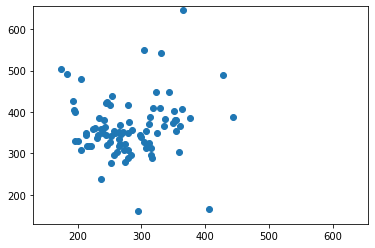

In [23]:
plt.scatter(tdatasme[:,1],tdatasme[:,0])
plt.xlim(130,655)
plt.ylim(130,655)

(130.0, 655.0)

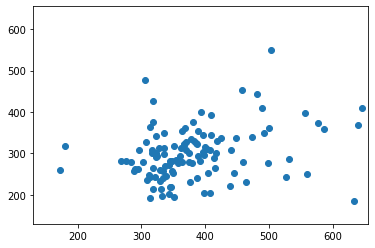

In [24]:
plt.scatter(ctdatasme[:,1],ctdatasme[:,0])
plt.xlim(130,655)
plt.ylim(130,655)

In [25]:
dataallmep=pd.DataFrame(tdatasme)
dataallmep.columns=['DV','IV','type']
dataallmap=pd.DataFrame(tdatasma)
dataallmap.columns=['DV','IV','type']
dataallmip=pd.DataFrame(tdatasmi)
dataallmip.columns=['DV','IV','type']
dataallrp=pd.DataFrame(tdatasr)
dataallrp.columns=['DV','IV','type']

In [26]:
cdataallmep=pd.DataFrame(ctdatasme)
cdataallmep.columns=['DV','IV','type']
cdataallmap=pd.DataFrame(ctdatasma)
cdataallmap.columns=['DV','IV','type']
cdataallmip=pd.DataFrame(ctdatasmi)
cdataallmip.columns=['DV','IV','type']
cdataallrp=pd.DataFrame(ctdatasr)
cdataallrp.columns=['DV','IV','type']

In [27]:
#dataallmep.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\msme.csv')
#dataallmap.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\msma.csv')
#dataallmip.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\msmi.csv')
#dataallrp.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\msr.csv')

#cdataallmep.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\csme.csv')
#cdataallmap.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\csma.csv')
#cdataallmip.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\csmi.csv')
#cdataallrp.to_csv(r'C:\LJR\paper\tseltalvsenglish\dataplot\English\turn\csr.csv')

In [28]:
print('cofft of f0_range=',stats.pearsonr(dataallrp['IV'],dataallrp['DV']))
print('cofft of f0_max=',stats.pearsonr(dataallmap['IV'],dataallmap['DV']))
print('cofft of f0_min=',stats.pearsonr(dataallmip['IV'],dataallmip['DV']))
print('cofft of f0_mean=',stats.pearsonr(dataallmep['IV'],dataallmep['DV']))

cofft of f0_range= PearsonRResult(statistic=0.299502639464911, pvalue=0.00413394942186506)
cofft of f0_max= PearsonRResult(statistic=0.20783227020087178, pvalue=0.04934149024893539)
cofft of f0_min= PearsonRResult(statistic=0.039539762208130026, pvalue=0.7113761956174285)
cofft of f0_mean= PearsonRResult(statistic=0.0961268674036726, pvalue=0.36743865699822)


In [29]:
print('cofft of cf0_range=',stats.pearsonr(cdataallrp['IV'],cdataallrp['DV']))
print('cofft of cf0_max=',stats.pearsonr(cdataallmap['IV'],cdataallmap['DV']))
print('cofft of cf0_min=',stats.pearsonr(cdataallmip['IV'],cdataallmip['DV']))
print('cofft of cf0_mean=',stats.pearsonr(cdataallmep['IV'],cdataallmep['DV']))

cofft of cf0_range= PearsonRResult(statistic=0.2571773146858597, pvalue=0.0049330773696879)
cofft of cf0_max= PearsonRResult(statistic=0.2203751857756907, pvalue=0.016486540364629314)
cofft of cf0_min= PearsonRResult(statistic=0.2846223515288137, pvalue=0.0017856167604730431)
cofft of cf0_mean= PearsonRResult(statistic=0.2819172681990975, pvalue=0.001982839583572359)


In [30]:
dataallmepn=(dataallmep-dataallmep.mean())/dataallmep.std()
dataallmapn=(dataallmap-dataallmap.mean())/dataallmap.std()
dataallmipn=(dataallmip-dataallmip.mean())/dataallmip.std()
dataallrpn=(dataallrp-dataallrp.mean())/dataallrp.std()

In [31]:
cdataallmepn=(cdataallmep-cdataallmep.mean())/cdataallmep.std()
cdataallmapn=(cdataallmap-cdataallmap.mean())/cdataallmap.std()
cdataallmipn=(cdataallmip-cdataallmip.mean())/cdataallmip.std()
cdataallrpn=(cdataallrp-cdataallrp.mean())/cdataallrp.std()

In [32]:
med=smf.mixedlm("DV~IV",dataallmep,groups=dataallmep['type'])

#medf = med.fit(method=['powell'])
medf = med.fit(method=['nm'])
print(medf.summary())
print(medf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 90      Method:             REML     
No. Groups:       6       Scale:              4596.9996
Min. group size:  4       Log-Likelihood:     -507.6027
Max. group size:  51      Converged:          Yes      
Mean group size:  15.0                                 
-------------------------------------------------------
           Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept  326.653   38.931 8.391 0.000 250.351 402.956
IV           0.095    0.124 0.762 0.446  -0.149   0.338
Group Var 1179.980   19.441                            

0.7623414670814005


In [33]:
med=smf.mixedlm("DV~IV",dataallmep,groups=dataallmep['type'],re_formula="~IV")

#medf = med.fit(method=['powell'])
medf = med.fit(method=['nm'])
print(medf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    90       Method:              REML     
No. Groups:          6        Scale:               4341.6650
Min. group size:     4        Log-Likelihood:      -510.0247
Max. group size:     51       Converged:           Yes      
Mean group size:     15.0                                   
------------------------------------------------------------
                Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept       328.026   47.017 6.977 0.000 235.874 420.179
IV                0.072    0.123 0.588 0.556  -0.169   0.313
Group Var      6327.464                                     
Group x IV Cov    7.573                                     
IV Var            0.009                                     



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [34]:
med=smf.mixedlm("DV~IV",dataallmep,groups=dataallmep['type'],re_formula="~IV")
free=sm.regression.mixed_linear_model.MixedLMParams.from_components(
np.ones(2),np.eye(2))
#medf = med.fit(method=['powell'])
medf = med.fit(free=free,method=['nm'])
print(medf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    90       Method:              REML     
No. Groups:          6        Scale:               4341.6650
Min. group size:     4        Log-Likelihood:      -510.0247
Max. group size:     51       Converged:           Yes      
Mean group size:     15.0                                   
------------------------------------------------------------
                Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept       328.026   47.446 6.914 0.000 235.033 421.020
IV                0.072    0.125 0.578 0.563  -0.173   0.318
Group Var      6327.464                                     
Group x IV Cov    7.573    0.000                            
IV Var            0.009                                     



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [35]:
mad=smf.mixedlm("DV~IV",dataallmap,groups=dataallmap['type'])
madf = mad.fit(method=['nm'])
print(madf.summary())
print(madf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV        
No. Observations: 90      Method:             REML      
No. Groups:       6       Scale:              10196.8198
Min. group size:  4       Log-Likelihood:     -542.9181 
Max. group size:  51      Converged:          Yes       
Mean group size:  15.0                                  
--------------------------------------------------------
            Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   343.521   46.522 7.384 0.000 252.339 434.703
IV            0.204    0.119 1.714 0.087  -0.029   0.437
Group Var  2344.379   26.770                            

1.7135104532715373


In [36]:
mad=smf.mixedlm("DV~IV",dataallmap,groups=dataallmap['type'],re_formula="~IV")
madf = mad.fit(method=['nm'])
print(madf.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   DV       
No. Observations:   90        Method:               REML     
No. Groups:         6         Scale:                9615.5111
Min. group size:    4         Log-Likelihood:       -545.6648
Max. group size:    51        Converged:            Yes      
Mean group size:    15.0                                     
-------------------------------------------------------------
                 Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept        349.626   56.601 6.177 0.000 238.689 460.562
IV                 0.159    0.100 1.590 0.112  -0.037   0.354
Group Var      14013.473                                     
Group x IV Cov    16.772                                     
IV Var             0.020                                     



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [37]:
mad=smf.mixedlm("DV~IV",dataallmap,groups=dataallmap['type'],re_formula="~IV")
free=sm.regression.mixed_linear_model.MixedLMParams.from_components(
np.ones(2),np.eye(2))
madf = mad.fit(free=free,method=['nm'])
print(madf.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   DV       
No. Observations:   90        Method:               REML     
No. Groups:         6         Scale:                9615.5111
Min. group size:    4         Log-Likelihood:       -545.6648
Max. group size:    51        Converged:            Yes      
Mean group size:    15.0                                     
-------------------------------------------------------------
                 Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept        349.626   62.220 5.619 0.000 227.677 471.575
IV                 0.159    0.127 1.250 0.211  -0.090   0.407
Group Var      14013.473                                     
Group x IV Cov    16.772    0.000                            
IV Var             0.020                                     



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [38]:
mid=smf.mixedlm("DV~IV",dataallmip,groups=dataallmip['type'])
midf = mid.fit(method=['nm'])
print(midf.summary())
print(midf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 90      Method:             REML     
No. Groups:       6       Scale:              3413.9323
Min. group size:  4       Log-Likelihood:     -491.3818
Max. group size:  51      Converged:          Yes      
Mean group size:  15.0                                 
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 290.323   24.975 11.625 0.000 241.374 339.273
IV          0.040    0.107  0.372 0.710  -0.170   0.250
Group Var   0.000                                      

0.3718115673238064


C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [39]:
mid=smf.mixedlm("DV~IV",dataallmip,groups=dataallmip['type'],re_formula="~IV")
midf = mid.fit(method=['nm'])
print(midf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    90       Method:              REML     
No. Groups:          6        Scale:               3361.8557
Min. group size:     4        Log-Likelihood:      -491.3850
Max. group size:     51       Converged:           No       
Mean group size:     15.0                                   
------------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      291.869   26.105 11.181 0.000 240.704 343.034
IV               0.033    0.120  0.272 0.786  -0.203   0.269
Group Var      253.808                                      
Group x IV Cov  -1.620                                      
IV Var           0.010                                      



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 48.757929
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [40]:
mid=smf.mixedlm("DV~IV",dataallmip,groups=dataallmip['type'],re_formula="~IV")
free=sm.regression.mixed_linear_model.MixedLMParams.from_components(
np.ones(2),np.eye(2))
midf = mid.fit(free=free,method=['nm'])
print(midf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    90       Method:              REML     
No. Groups:          6        Scale:               3361.8557
Min. group size:     4        Log-Likelihood:      -491.3850
Max. group size:     51       Converged:           No       
Mean group size:     15.0                                   
------------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      291.869   26.148 11.162 0.000 240.620 343.118
IV               0.033    0.120  0.272 0.786  -0.203   0.269
Group Var      253.808   10.955                             
Group x IV Cov  -1.620    0.000                             
IV Var           0.010    0.000                             



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 19.893975
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [41]:
rd=smf.mixedlm("DV~IV",dataallrp,groups=dataallrp['type'])
rdf = rd.fit(method=['nm'])

print(rdf.summary())
print(rdf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 90      Method:             REML     
No. Groups:       6       Scale:              7165.5089
Min. group size:  4       Log-Likelihood:     -526.1052
Max. group size:  51      Converged:          Yes      
Mean group size:  15.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z   P>|z| [0.025  0.975]
-------------------------------------------------------
Intercept    86.685   20.152 4.302 0.000 47.187 126.182
IV            0.317    0.120 2.641 0.008  0.082   0.553
Group Var   761.412   14.442                           

2.6406132505514015


In [42]:
rd=smf.mixedlm("DV~IV",dataallrp,groups=dataallrp['type'],re_formula="~IV")
rdf = rd.fit(method=['nm'])

print(rdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DV       
No. Observations:   90       Method:              REML     
No. Groups:         6        Scale:               6764.9941
Min. group size:    4        Log-Likelihood:      -528.8810
Max. group size:    51       Converged:           Yes      
Mean group size:    15.0                                   
-----------------------------------------------------------
                Coef.   Std.Err.   z   P>|z| [0.025  0.975]
-----------------------------------------------------------
Intercept        83.221   43.053 1.933 0.053 -1.161 167.604
IV                0.262    0.106 2.468 0.014  0.054   0.470
Group Var      9854.120                                    
Group x IV Cov   11.792                                    
IV Var            0.014                                    



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [43]:
rd=smf.mixedlm("DV~IV",dataallrp,groups=dataallrp['type'],re_formula="~IV")
free=sm.regression.mixed_linear_model.MixedLMParams.from_components(
np.ones(2),np.eye(2))

rdf = rd.fit(free=free,method=['nm'])

print(rdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DV       
No. Observations:   90       Method:              REML     
No. Groups:         6        Scale:               6764.9941
Min. group size:    4        Log-Likelihood:      -528.8810
Max. group size:    51       Converged:           Yes      
Mean group size:    15.0                                   
-----------------------------------------------------------
                Coef.   Std.Err.   z   P>|z| [0.025  0.975]
-----------------------------------------------------------
Intercept        83.221   43.419 1.917 0.055 -1.878 168.321
IV                0.262    0.130 2.020 0.043  0.008   0.516
Group Var      9854.120                                    
Group x IV Cov   11.792    0.000                           
IV Var            0.014                                    



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [44]:
cmed=smf.mixedlm("DV~IV",cdataallmep,groups=cdataallmep['type'])
cmedf = cmed.fit(method=['powell'])
print(cmedf.summary())
print(cmedf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 118     Method:             REML     
No. Groups:       6       Scale:              3190.6960
Min. group size:  7       Log-Likelihood:     -645.3770
Max. group size:  54      Converged:          Yes      
Mean group size:  19.7                                 
-------------------------------------------------------
            Coef.  Std.Err.   z   P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept  248.226   25.307 9.809 0.000 198.625 297.826
IV           0.137    0.057 2.415 0.016   0.026   0.248
Group Var  692.166    9.711                            

2.4154516400271033


In [45]:
cmed=smf.mixedlm("DV~IV",cdataallmepn,groups=cdataallmepn['type'],re_formula="~IV")
cmedf = cmed.fit(method=['powell'])
print(cmedf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 118     Method:             REML     
No. Groups:       6       Scale:              0.7383   
Min. group size:  7       Log-Likelihood:     -156.7946
Max. group size:  54      Converged:          Yes      
Mean group size:  19.7                                 
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept      0.027    0.195 0.138 0.891 -0.356  0.409
IV             0.165    0.146 1.127 0.260 -0.122  0.451
Group Var      0.161    0.153                          
Group x IV Cov 0.046    0.084                          
IV Var         0.062    0.107                          



In [46]:
cmed=smf.mixedlm("DV~IV",cdataallmep,groups=cdataallmep['type'],re_formula="~IV")
cmedf = cmed.fit(method=['powell'])
print(cmedf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    118      Method:              REML     
No. Groups:          6        Scale:               3063.3450
Min. group size:     7        Log-Likelihood:      -644.6384
Max. group size:     54       Converged:           Yes      
Mean group size:     19.7                                   
------------------------------------------------------------
                Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept       258.753   36.192 7.149 0.000 187.818 329.688
IV                0.108    0.099 1.095 0.274  -0.086   0.302
Group Var      3604.690  104.278                            
Group x IV Cov   -9.509    0.282                            
IV Var            0.029    0.001                            



In [47]:
cmad=smf.mixedlm("DV~IV",cdataallmap,groups=cdataallmap['type'])
cmadf = cmad.fit(method=['powell'])
print(cmadf.summary())
print(cmadf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: DV       
No. Observations:  118     Method:             REML     
No. Groups:        6       Scale:              8271.5908
Min. group size:   7       Log-Likelihood:     -700.4178
Max. group size:   54      Converged:          Yes      
Mean group size:   19.7                                 
--------------------------------------------------------
           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  316.740   30.181 10.495 0.000 257.585 375.894
IV           0.109    0.052  2.081 0.037   0.006   0.211
Group Var 1147.819   11.341                             

2.080994474513404


In [48]:
cmad=smf.mixedlm("DV~IV",cdataallmapn,groups=cdataallmapn['type'],re_formula="~IV")
cmadf = cmad.fit(method=['powell'])

print(cmadf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: DV       
No. Observations:   118     Method:             REML     
No. Groups:         6       Scale:              0.8581   
Min. group size:    7       Log-Likelihood:     -163.4623
Max. group size:    54      Converged:          Yes      
Mean group size:    19.7                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      -0.063    0.182 -0.345 0.730 -0.420  0.295
IV              0.201    0.098  2.063 0.039  0.010  0.392
Group Var       0.126    0.121                           
Group x IV Cov -0.027    0.055                           
IV Var          0.006    0.052                           



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [49]:
cmad=smf.mixedlm("DV~IV",cdataallmap,groups=cdataallmap['type'],re_formula="~IV")
cmadf = cmad.fit(method=['powell'])

print(cmadf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    118      Method:              REML     
No. Groups:          6        Scale:               8115.5807
Min. group size:     7        Log-Likelihood:      -700.3511
Max. group size:     54       Converged:           Yes      
Mean group size:     19.7                                   
------------------------------------------------------------
                Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept       309.795   43.951 7.049 0.000 223.652 395.937
IV                0.125    0.065 1.925 0.054  -0.002   0.253
Group Var      6606.948  173.679                            
Group x IV Cov   -6.629    0.247                            
IV Var            0.007    0.000                            



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [50]:
cmad=smf.mixedlm("DV~IV",cdataallmap,groups=cdataallmap['type'],re_formula="~IV")
cmadf = cmad.fit(method=['powell'])
free=sm.regression.mixed_linear_model.MixedLMParams.from_components(
np.ones(2),np.eye(2))

print(cmadf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    118      Method:              REML     
No. Groups:          6        Scale:               8115.5807
Min. group size:     7        Log-Likelihood:      -700.3511
Max. group size:     54       Converged:           Yes      
Mean group size:     19.7                                   
------------------------------------------------------------
                Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept       309.795   43.951 7.049 0.000 223.652 395.937
IV                0.125    0.065 1.925 0.054  -0.002   0.253
Group Var      6606.948  173.679                            
Group x IV Cov   -6.629    0.247                            
IV Var            0.007    0.000                            



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [51]:
cmid=smf.mixedlm("DV~IV",cdataallmip,groups=cdataallmip['type'])
cmidf = cmid.fit(method=['nm'])
print(cmidf.summary())
print(cmidf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 118     Method:             REML     
No. Groups:       6       Scale:              3584.7022
Min. group size:  7       Log-Likelihood:     -651.7120
Max. group size:  54      Converged:          Yes      
Mean group size:  19.7                                 
-------------------------------------------------------
            Coef.  Std.Err.   z   P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept  192.946   25.610 7.534 0.000 142.750 243.141
IV           0.189    0.070 2.708 0.007   0.052   0.325
Group Var  669.391    9.137                            

2.707593151670359


In [52]:
cmid=smf.mixedlm("DV~IV",cdataallmipn,groups=cdataallmipn['type'],re_formula="~IV")
cmidf = cmid.fit(method=['powell'])
print(cmidf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 118     Method:             REML     
No. Groups:       6       Scale:              0.7448   
Min. group size:  7       Log-Likelihood:     -157.2725
Max. group size:  54      Converged:          Yes      
Mean group size:  19.7                                 
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept      0.117    0.173 0.673 0.501 -0.223  0.456
IV             0.138    0.176 0.787 0.431 -0.206  0.483
Group Var      0.113    0.110                          
Group x IV Cov 0.008    0.074                          
IV Var         0.091    0.151                          



In [53]:
cmid=smf.mixedlm("DV~IV",cdataallmip,groups=cdataallmip['type'],re_formula="~IV")
cmidf = cmid.fit(method=['powell'])
print(cmidf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    118      Method:              REML     
No. Groups:          6        Scale:               3446.8815
Min. group size:     7        Log-Likelihood:      -650.9357
Max. group size:     54       Converged:           Yes      
Mean group size:     19.7                                   
------------------------------------------------------------
                Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept       214.046   43.392 4.933 0.000 128.999 299.094
IV                0.121    0.135 0.891 0.373  -0.145   0.386
Group Var      5050.362  116.781                            
Group x IV Cov  -14.837    0.368                            
IV Var            0.049    0.001                            



In [54]:
cmid=smf.mixedlm("DV~IV",cdataallmip,groups=cdataallmip['type'],re_formula="~IV")
cmidf = cmid.fit(method=['powell'])
free=sm.regression.mixed_linear_model.MixedLMParams.from_components(
np.ones(2),np.eye(2))
print(cmidf.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  DV       
No. Observations:    118      Method:              REML     
No. Groups:          6        Scale:               3446.8815
Min. group size:     7        Log-Likelihood:      -650.9357
Max. group size:     54       Converged:           Yes      
Mean group size:     19.7                                   
------------------------------------------------------------
                Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept       214.046   43.392 4.933 0.000 128.999 299.094
IV                0.121    0.135 0.891 0.373  -0.145   0.386
Group Var      5050.362  116.781                            
Group x IV Cov  -14.837    0.368                            
IV Var            0.049    0.001                            



In [55]:
crd=smf.mixedlm("DV~IV",cdataallrp,groups=cdataallrp['type'])
crdf = crd.fit(method=['nm'])
print(crdf.summary())
print(crdf.tvalues['IV'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV       
No. Observations: 118     Method:             REML     
No. Groups:       6       Scale:              7621.5534
Min. group size:  7       Log-Likelihood:     -694.7340
Max. group size:  54      Converged:          Yes      
Mean group size:  19.7                                 
-------------------------------------------------------
             Coef.  Std.Err.   z   P>|z| [0.025  0.975]
-------------------------------------------------------
Intercept    93.720   17.272 5.426 0.000 59.867 127.573
IV            0.155    0.059 2.635 0.008  0.040   0.270
Group Var   619.740    8.112                           

2.6349986293063505


In [56]:
crd=smf.mixedlm("DV~IV",cdataallrpn,groups=cdataallrpn['type'],re_formula="~IV")
crdf = crd.fit(method=['powell'])
print(crdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: DV       
No. Observations:   118     Method:             REML     
No. Groups:         6       Scale:              0.8899   
Min. group size:    7       Log-Likelihood:     -164.6828
Max. group size:    54      Converged:          Yes      
Mean group size:    19.7                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      -0.134    0.163 -0.822 0.411 -0.454  0.186
IV              0.239    0.103  2.325 0.020  0.037  0.440
Group Var       0.072    0.087                           
Group x IV Cov -0.003    0.041                           
IV Var          0.002    0.034                           



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [57]:
crd=smf.mixedlm("DV~IV",cdataallrp,groups=cdataallrp['type'],re_formula="~IV")
crdf = crd.fit(method=['powell'])
print(crdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  DV       
No. Observations:   118      Method:              REML     
No. Groups:         6        Scale:               7371.0986
Min. group size:    7        Log-Likelihood:      -696.4700
Max. group size:    54       Converged:           Yes      
Mean group size:    19.7                                   
-----------------------------------------------------------
                Coef.   Std.Err.   z   P>|z| [0.025  0.975]
-----------------------------------------------------------
Intercept        87.432   34.009 2.571 0.010 20.775 154.089
IV                0.163    0.075 2.179 0.029  0.016   0.309
Group Var      5841.579                                    
Group x IV Cov   -6.292    0.123                           
IV Var            0.008    0.000                           



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [58]:
crd=smf.mixedlm("DV~IV",cdataallrp,groups=cdataallrp['type'],re_formula="~IV")
crdf = crd.fit(method=['nm'])
free=sm.regression.mixed_linear_model.MixedLMParams.from_components(
np.ones(2),np.eye(2))
print(crdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  DV       
No. Observations:  118      Method:              REML     
No. Groups:        6        Scale:               7607.1116
Min. group size:   7        Log-Likelihood:      -694.7288
Max. group size:   54       Converged:           Yes      
Mean group size:   19.7                                   
----------------------------------------------------------
                Coef.  Std.Err.   z   P>|z| [0.025  0.975]
----------------------------------------------------------
Intercept       93.386   17.996 5.189 0.000 58.114 128.657
IV               0.158    0.068 2.325 0.020  0.025   0.291
Group Var      706.630   13.438                           
Group x IV Cov  -0.345    0.041                           
IV Var           0.001    0.000                           



C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


[(-10.0, 800.0)]

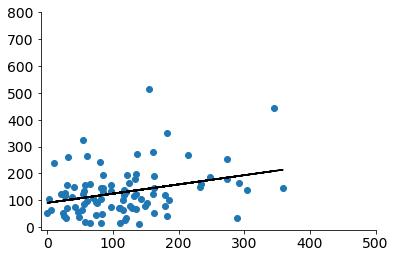

In [59]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])

fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
#ax=sns.lmplot(x='Mothers f0_range', y='Infants f0_range',data=f0rangep, sharex=False, sharey=False)
plt.scatter(dataallrp['IV'],dataallrp['DV'])
linear_model=np.polyfit(dataallrp['IV'],dataallrp['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dataallrp['IV'],linear_model_fn(dataallrp['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(xlim=(-10, 500))
ax.set(ylim=(-10, 800))

[(-10.0, 800.0)]

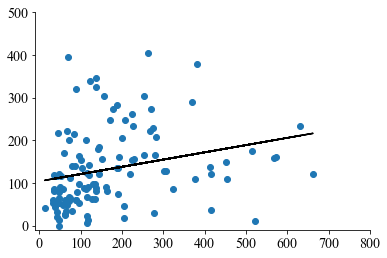

In [60]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
#ax=sns.lmplot(x='Mothers f0_ranges', y='Infants f0_ranges',data=f0rangeps, sharex=False, sharey=False)
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(cdataallrp['IV'],cdataallrp['DV'])
linear_model=np.polyfit(cdataallrp['IV'],cdataallrp['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(cdataallrp['IV'],linear_model_fn(cdataallrp['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(-10, 500))
ax.set(xlim=(-10, 800))

[(100.0, 1100.0)]

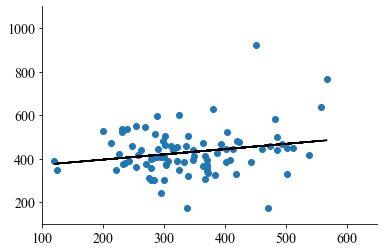

In [61]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
#ax=sns.lmplot(x='Mothers f0_max', y='Infants f0_max',data=f0maxp, sharex=False, sharey=False)
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(dataallmap['IV'],dataallmap['DV'])
linear_model=np.polyfit(dataallmap['IV'],dataallmap['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dataallmap['IV'],linear_model_fn(dataallmap['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(xlim=(100, 650))
ax.set(ylim=(100, 1100))

[(100.0, 1100.0)]

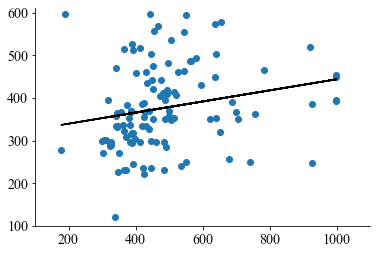

In [62]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(cdataallmap['IV'],cdataallmap['DV'])
linear_model=np.polyfit(cdataallmap['IV'],cdataallmap['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(cdataallmap['IV'],linear_model_fn(cdataallmap['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(100, 610))
ax.set(xlim=(100, 1100))


[(100.0, 450.0)]

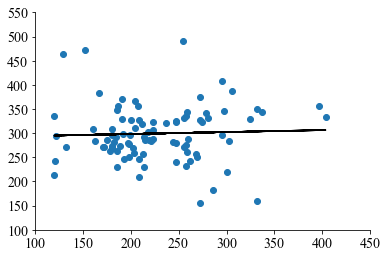

In [63]:
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(dataallmip['IV'],dataallmip['DV'])
linear_model=np.polyfit(dataallmip['IV'],dataallmip['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dataallmip['IV'],linear_model_fn(dataallmip['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(100, 550))
ax.set(xlim=(100, 450))

[(100.0, 600.0)]

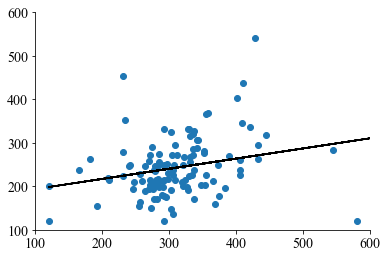

In [64]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(cdataallmip['IV'],cdataallmip['DV'])
linear_model=np.polyfit(cdataallmip['IV'],cdataallmip['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(cdataallmip['IV'],linear_model_fn(cdataallmip['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(xlim=(100, 600))
ax.set(ylim=(100, 600))

[(100.0, 600.0)]

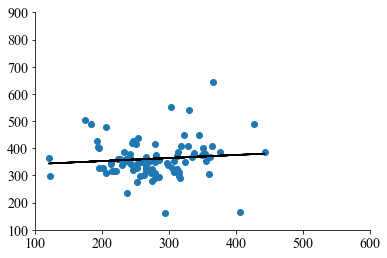

In [65]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(dataallmep['IV'],dataallmep['DV'])
linear_model=np.polyfit(dataallmep['IV'],dataallmep['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dataallmep['IV'],linear_model_fn(dataallmep['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(100, 900))
ax.set(xlim=(100, 600))

[(50.0, 600.0)]

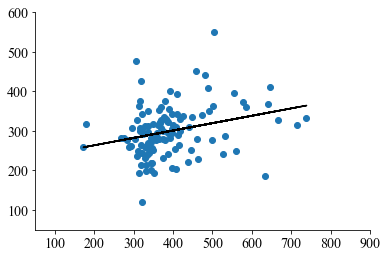

In [66]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])

fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(cdataallmep['IV'],cdataallmep['DV'])
linear_model=np.polyfit(cdataallmep['IV'],cdataallmep['DV'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(cdataallmep['IV'],linear_model_fn(cdataallmep['IV']),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(xlim=(50, 900))
ax.set(ylim=(50, 600))

In [67]:
print('chismec=',np.std(cdataallmep['IV']),'chismem=',np.std(cdataallmep['DV']))
print('chismac=',np.std(cdataallmap['IV']),'chismam=',np.std(cdataallmap['DV']))
print('chismic=',np.std(cdataallmep['IV']),'chismim=',np.std(cdataallmip['DV']))
print('chisrc=',np.std(cdataallrp['IV']),'chisrm=',np.std(cdataallrp['DV']))

chismec= 96.97266116061743 chismem= 64.18736818001211
chismac= 164.8770781209929 chismam= 97.3641841267192
chismic= 96.97266116061743 chismim= 67.57790191746416
chisrc= 139.3747466013011 chisrm= 92.06619461749835


In [68]:
print('fasmem=',np.std(dataallmep['IV']),'fasmem=',np.std(dataallmep['DV']))
print('fasmam=',np.std(dataallmap['IV']),'fasmam=',np.std(dataallmap['DV']))
print('fasmim=',np.std(dataallmep['IV']),'fasmim=',np.std(dataallmip['DV']))
print('fasrm=',np.std(dataallrp['IV']),'fasrm=',np.std(dataallrp['DV']))

fasmem= 60.364884668049584 fasmem= 70.6605070233226
fasmam= 91.85783425862823 fasmam= 106.77981185100738
fasmim= 60.364884668049584 fasmim= 57.821225151810644
fasrm= 78.3899298333771 fasrm= 89.9050683685865
